In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [2]:
credits = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
movies = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.shape

(4803, 4)

In [5]:
movies.shape

(4803, 20)

In [6]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

## How to get the weighted averages

In [7]:
V = movies['vote_count']
R = movies['vote_average']
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.7)

movies['weight_avg'] = (V/(V+m) * R) + (m/(m+V) * C)

# Building a Basic Recommendation System


# Recommendation by Weighted Average Ratings

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

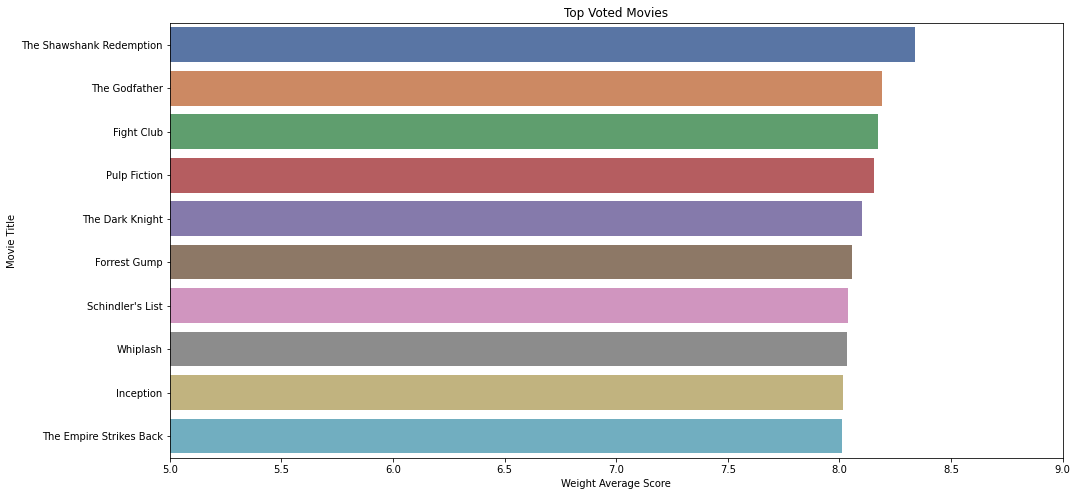

In [9]:
weight_avg = movies.sort_values('weight_avg', ascending=False)

plt.figure(figsize=(16,8))

ax = sns.barplot(x=weight_avg['weight_avg'].head(10),
                 y=weight_avg['original_title'].head(10),
                 data=weight_avg, palette='deep')

plt.title("Top Voted Movies")
plt.xlabel('Weight Average Score')
plt.ylabel('Movie Title')
plt.xlim(5, 9)
plt.show()

# Recommendation by Popularity

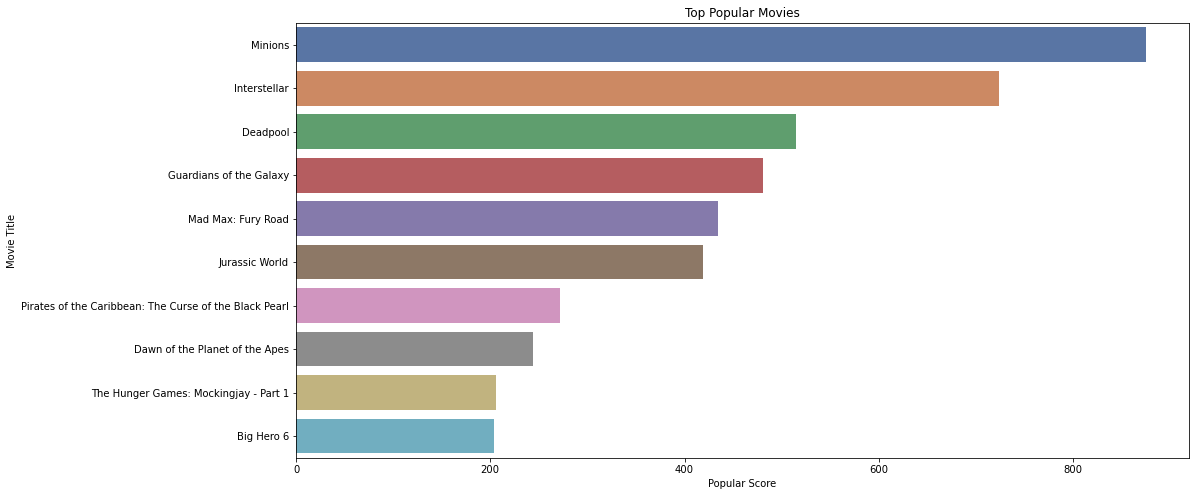

In [10]:
popular = movies.sort_values('popularity', ascending=False)

plt.figure(figsize=(16,8))

ax= sns.barplot(x=popular['popularity'].head(10),
                y=popular['original_title'].head(10),
                data=popular, palette='deep')

plt.title("Top Popular Movies")
plt.xlabel('Popular Score')
plt.ylabel('Movie Title')

plt.show()

# Recommendation by Weight and Popularity

In [11]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
movies_scaler = min_max_scaler.fit_transform(movies[['weight_avg', 'popularity']])
movies_norm = pd.DataFrame(movies_scaler, columns=['weight_avg', 'popularity'])

movies_norm.head(5)

,weight_avg,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [12]:
movies[['norm_weight_avg', 'norm_popularity']] = movies_norm

movies['score'] = movies['norm_weight_avg']*0.5 + movies['norm_popularity']*0.5
movies_scored = movies.sort_values(['score'], ascending=False)
movies_scored[['original_title', 'norm_weight_avg', 'norm_popularity', 'score']].head(20)

,original_title,norm_weight_avg,norm_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


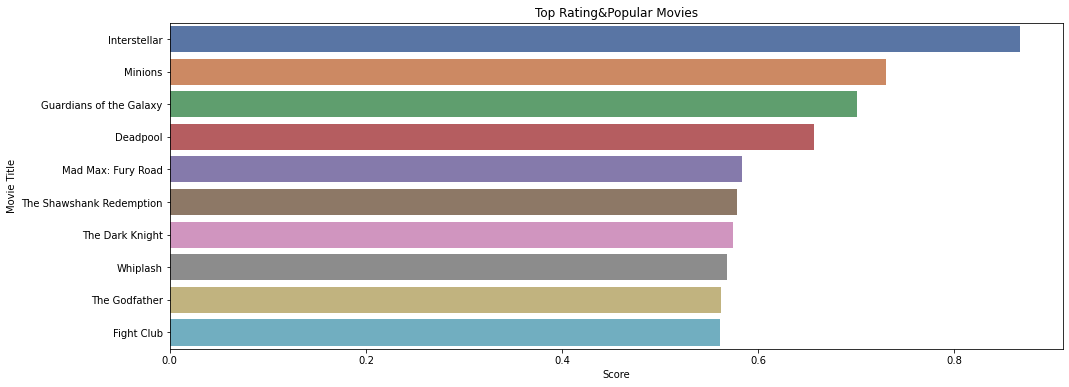

In [13]:
score = movies.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=score['score'].head(10),
                 y=score['original_title'].head(10),
                 data=score, palette='deep')

plt.title("Top Rating&Popular Movies")
plt.xlabel('Score')
plt.ylabel('Movie Title')

plt.show()

# **Content-Based Filtering**

## Recommendation by sharing similar plot summaries

#### Word Vectorization and TF-IDF to convert test in the overview to word vectors

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Abhishek Thakur's arguments for TF-IDF

In [15]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

In [16]:
movies['overview'] = movies['overview'].fillna('')

tfv_matrix = tfv.fit_transform(movies['overview'])
tfv_matrix.shape

(4803, 10417)

## Calculating Similarity Scores


In [17]:
from sklearn.metrics.pairwise import sigmoid_kernel

sigmoid = sigmoid_kernel(tfv_matrix, tfv_matrix)

indices = pd.Series(movies.index, index=movies['original_title']).drop_duplicates()

def recommend(title, sig=sigmoid):
    index = indices[title]
    score = list(enumerate(sigmoid[index]))
    score = sorted(score, key=lambda x: x[1], reverse=True)
    
    #score of first 10 similar movies
    score = score[1:11]
    
    movie_index = [i[0] for i in score]
    
    return movies['original_title'].iloc[movie_index]

In [18]:
recommend('In Too Deep')

1162    He's Just Not That Into You
1631                       Mr. 3000
4310            Grand Theft Parsons
4009          2016: Obama's America
3193                       Barbecue
1363                       Spy Kids
4795                           Bang
3076             The House of Mirth
702                 The Italian Job
460                       Zookeeper
Name: original_title, dtype: object

In [19]:
recommend('Minions')

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
2892                        Darling Companion
4403                           The Jimmy Show
990                        The Scarlet Letter
70                             Wild Wild West
2511                               Home Alone
Name: original_title, dtype: object